In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import fastai.collab as fc #collaborative filtering
import fastai.tabular.all as ft
import pandas as pd

import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [3]:
animes = pd.read_csv("Data/anime/animes.csv");animes

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,"Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead. \r\n \r\nWhen they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players. By playing with some of the toughest teams in Japan, they hope not only to sharpen their skills, but also come up with new attacks that would strengthen them. Moreover, Hinata and Kageyama attempt to d...","['Comedy', 'Sports', 'Drama', 'School', 'Shounen']","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/76662.jpg,https://myanimelist.net/anime/28891/Haikyuu_Second_Season
1,23273,Shigatsu wa Kimi no Uso,"Music accompanies the path of the human metronome, the prodigious pianist Kousei Arima. But after the passing of his mother, Saki Arima, Kousei falls into a downward spiral, rendering him unable to hear the sound of his own piano. \r\n \r\nTwo years later, Kousei still avoids the piano, leaving behind his admirers and rivals, and lives a colorless life alongside his friends Tsubaki Sawabe and Ryouta Watari. However, everything changes when he meets a beautiful violinist, Kaori Miyazono, who stirs up his world and sets him on a journey to face music again. \r\n \r\nBased on the manga serie...","['Drama', 'Music', 'Romance', 'School', 'Shounen']","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/67177.jpg,https://myanimelist.net/anime/23273/Shigatsu_wa_Kimi_no_Uso
2,34599,Made in Abyss,"The Abyss—a gaping chasm stretching down into the depths of the earth, filled with mysterious creatures and relics from a time long past. How did it come to be? What lies at the bottom? Countless brave individuals, known as Divers, have sought to solve these mysteries of the Abyss, fearlessly descending into its darkest realms. The best and bravest of the Divers, the White Whistles, are hailed as legends by those who remain on the surface. \r\n \r\nRiko, daughter of the missing White Whistle Lyza the Annihilator, aspires to become like her mother and explore the furthest reaches of the Aby...","['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/86733.jpg,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, something of equal value must be lost."" \r\n \r\nAlchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward's right arm that he is able to affix Alphonse's soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their orig...","['Action', 'Military', 'Adventure', 'Comedy', 'Drama', 'Magic', 'Fantasy', 'Shounen']","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/96541.jpg,https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood
4,31758,Kizumonogatari III: Reiketsu-hen,"After helping revive the legendary vampire Kiss-shot Acerola-orion Heart-under-blade, Koyomi Araragi has become a vampire himself and her servant. Kiss-shot is certain she can turn him back into a human, but only once regaining her full power. \r\n \r\nAraragi has hunted down the three vampire hunters that defeated Kiss-shot and retrieved her limbs to return her to full strength. However, now that Araragi has alm

In [4]:
users = pd.read_csv('Data/anime/profiles.csv'); users

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '9253', '34599', '3588', '13601', '6956']",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32281', '9989', '1943', '512']",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382', '849', '235', '35180', '31646']",https://myanimelist.net/profile/aManOfCulture99
...,...,...,...,...,...
81722,lovelessxd,Female,"Aug 6, 1992","['853', '5114']",https://myanimelist.net/profile/lovelessxd
81723,Shattered_Angel,Female,"Sep 6, 1994","['150', '27', '1520', '121', '31452', '32995', '877', '14713', '129', '11111']",https://myanimelist.net/profile/Shattered_Angel
81724,FluffyWalrus,Male,NaN,"['121', '43', '237', '202', '205']",https://myanimelist.net/profile/FluffyWalrus
81725,camco,Female,Sep 23,"['199', '4224', '7054', '13601', '14713']",https://myanimelist.net/profile/camco


In [5]:
ratings = pd.read_csv("Data/anime/reviews.csv"); ratings

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 8 \n \n \n Story \n 8 \n \n \n Animation \n 8 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n First things firs...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8', 'Sound': '10', 'Character': '9', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 10 \n \n \n Animation \n 10 \n \n \n Sound \n 10 \n \n \n Character \n 10 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n Let me start...,10,"{'Overall': '10', 'Story': '10', 'Animation': '10', 'Sound': '10', 'Character': '10', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 7 \n \n \n Story \n 7 \n \n \n Animation \n 9 \n \n \n Sound \n 8 \n \n \n Character \n 8 \n \n \n Enjoyment \n 8 \n \n \n \n\n \n Art 9/10: It is gr...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9', 'Sound': '8', 'Character': '8', 'Enjoyment': '8'}",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 9 \n \n \n Story \n 9 \n \n \n Animation \n 9 \n \n \n Sound \n 10 \n \n \n Character \n 10 \n \n \n Enjoyment \n 9 \n \n \n \n\n \n Story \r\n \r\nt...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9', 'Sound': '10', 'Character': '10', 'Enjoyment': '9'}",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 10 \n \n \n Animation \n 8 \n \n \n Sound \n 9 \n \n \n Character \n 10 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n Kyoto Animatio...,10,"{'Overall': '10', 'Story': '10', 'Animation': '8', 'Sound': '9', 'Character': '10', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=291149
...,...,...,...,...,...,...,...
192107,240067,Unicorn819,1281,"\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 9 \n \n \n Story \n 5 \n \n \n Animation \n 10 \n \n \n Sound \n 10 \n \n \n Character \n 9 \n \n \n Enjoyment \n 9 \n \n \n \n\n \n Ok, this anime i...",9,"{'Overall': '9', 'Story': '5', 'Animation': '10', 'Sound': '10', 'Character': '9', 'Enjoyment': '9'}",https://myanimelist.net/reviews.php?id=240067
192108,285777,ShizzoSVH,1281,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 9 \n \n \n Story \n 7 \n \n \n Animation \n 9 \n \n \n Sound \n 9 \n \n \n Character \n 9 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n The dub for this ...,9,"{'Overall': '9', 'Story': '7', 'Animation': '9', 'Sound': '9', 'Character': '9', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=285777
192109,286904,AlluMan96,1281,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 3 \n \n \n Story \n 3 \n \n \n Animation \n 1 \n \n \n Sound \n 2 \n \n \n Character \n 2 \n \n \n Enjoyment \n 5 \n \n \n \n\n \n Some might argue t...,3,"{'Overall': '3', 'Story': '3', 'Animation': '1', 'Sound': '2', 'Character': '2', 'Enjoyment': '5'}",https://myanimelist.net/reviews.php?id=286904
192110,287903,AgentK300,1281,\n \n \n \n \n \n \n \n more pics \n \n \n \n \n \n Overall \n 10 \n \n \n Story \n 3 \n \n \n Animation \n 3 \n \n \n Sound \n 3 \n \n \n Character \n 3 \n \n \n Enjoyment \n 10 \n \n \n \n\n \n Absolutely hilar...,10,"{'Overall': '10', 'Story': '3', 'Animation': '3', 'Sound': '3', 'Character': '3', 'Enjoyment': '10'}",https://myanimelist.net/reviews.php?id=287903


Existe también la versión de películas "Movie Lens". 

Por parte del csv de animes: es importante el  número identificador para poder saber de qué anime hablan en los otros csv. Las ligas de los perfiles tampoco las usamos, ni la descripción o la imagen.

Usaremos de momento sólo los ratings. 

In [6]:
ratings.columns

Index(['uid', 'profile', 'anime_uid', 'text', 'score', 'scores', 'link'], dtype='object')

In [7]:
ratings = ratings[['uid','anime_uid','score']] #Después voy a necesitar un diccionario

In [8]:
ratings.head()

,uid,anime_uid,score
0,255938,34096,8
1,259117,34599,10
2,253664,28891,7
3,8254,2904,9
4,291149,4181,10


In [9]:
dls = fc.CollabDataLoaders.from_df(ratings, user_name='uid',rating_name='score',bs = 218)

In [10]:
def flat_l1(yp,y):
    return F.l1_loss(yp.view(-1),y.view(-1))
#Esto es porque no queremos realmente MSE

MSE no nos dice gran cosa porque está al cuadrado. Queremos saber por cuánto se está equivocando en "los puntos" de score. 

In [11]:
learn = fc.collab_learner(dls, opt_func=fc.ranger, metrics=flat_l1)

In [12]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(114204, 50)
  (i_weight): Embedding(7675, 50)
  (u_bias): Embedding(114204, 1)
  (i_bias): Embedding(7675, 1)
)

Los weights son los vectores que asocian "géneros" con los usuarios. El bias es como un numerito que le sumamos al usuario y anime... aunque algunos animes que son de romance y que a ti no te gusten, puede que sean muuuy buenos y puede que te gusten un poco más. No es estrictamente necesario poner esto, pero es el modelo que pone fastai.

In [13]:
learn.summary()

EmbeddingDotBias (Input shape: ['218 x 2'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            218 x 50             5,710,200  True      
________________________________________________________________
Embedding            218 x 50             383,750    True      
________________________________________________________________
Embedding            218 x 1              114,204    True      
________________________________________________________________
Embedding            218 x 1              7,675      True      
________________________________________________________________

Total params: 6,215,829
Total trainable params: 6,215,829
Total non-trainable params: 0

Optimizer used: <function ranger at 0x7f4646e0cee0>
Loss function: FlattenedLoss of MSELoss()

Callbacks:
  - TrainEvalCallback
  - Recorder
  - ProgressCallback

In [14]:
learn.model??

Ese 50 que vemos surge de los n_factors en el learner de collab que bien podríamos nosotros cambiar.

La función de forward lo que hace es multiplicar los usuarios por los items (sus embeddings) y pues los suma. Al final le suma los bias

SuggestedLRs(lr_min=0.2754228591918945, lr_steep=1.5848932266235352)

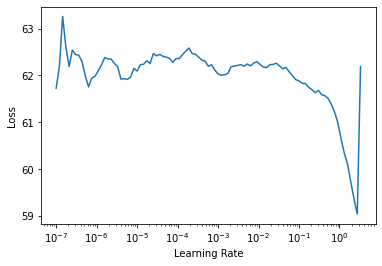

In [15]:
learn.lr_find()

In [16]:
learn.fit_one_cycle(20, 3e-2,div=1, pct_start=0.7)

epoch,train_loss,valid_loss,flat_l1,time
0,21.334827,19.634439,3.605228,00:09
1,7.653218,13.637118,2.839557,00:09
2,3.341803,12.883688,2.791024,00:08
3,2.778634,11.517373,2.546394,00:08
4,2.316081,10.813061,2.425534,00:09
5,2.021976,10.410868,2.347691,00:08
6,1.945397,10.062376,2.299909,00:08
7,1.944277,9.803211,2.247527,00:08
8,1.738684,9.637043,2.225185,00:08
9,1.766806,9.483297,2.192689,00:09


## Mejorando el modelo

Para empezar, 50 posibles categorías (n_factors) suena a que es demasiado. 

In [17]:
learn = fc.collab_learner(dls, opt_func=fc.ranger, n_factors=4, metrics=flat_l1)

In [18]:
learn.fit_one_cycle(20, 3e-2,div=1, pct_start=0.7)

epoch,train_loss,valid_loss,flat_l1,time
0,25.603811,23.693636,4.267417,00:07
1,9.940922,12.440754,2.709538,00:07
2,4.832033,9.720333,2.313016,00:07
3,2.775473,8.757591,2.184859,00:07
4,1.920338,8.123368,2.063911,00:07
5,1.405198,7.758246,1.978003,00:07
6,1.146961,7.508111,1.951762,00:07
7,1.032124,7.317522,1.892548,00:07
8,0.926976,7.177661,1.877251,00:07
9,0.859109,7.057131,1.843139,00:07


En lugar de usar el modelo de collaborative filtering, podemos usar directamente una red neuronal. Tenemos los embeddings, podemos predecir los scores. 

In [24]:
learn = fc.collab_learner(dls, opt_func=fc.ranger, use_nn=True, emb_szs={'uid':16, 'anime_uid':16},metrics=flat_l1)

In [20]:
learn.model

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(114204, 16)
    (1): Embedding(7675, 16)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=32, out_features=50, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=50, out_features=1, bias=True)
    )
  )
)

In [21]:
learn.summary()

EmbeddingNN (Input shape: ['218 x 2'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            218 x 16             1,827,264  True      
________________________________________________________________
Embedding            218 x 16             122,800    True      
________________________________________________________________
Dropout              218 x 32             0          False     
________________________________________________________________
BatchNorm1d          218 x 32             64         True      
________________________________________________________________
Linear               218 x 50             1,600      True      
________________________________________________________________
ReLU                 218 x 50             0          False     
________________________________________________________________
Linear               218 x 1              51         True      
___________________________________________________________

Ahorita ambos embeddings no tienen que ser del mismo tamaño necesriamente, antes sí porque hacíamos producto punto.

SuggestedLRs(lr_min=0.2290867567062378, lr_steep=0.14454397559165955)

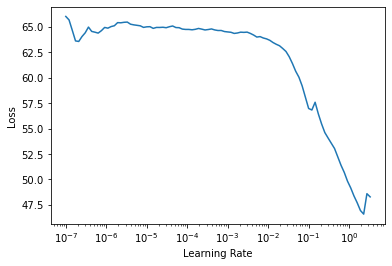

In [25]:
 learn.lr_find()

In [26]:
learn.fit_one_cycle(20, 3e-2,div=1,pct_start=0.7)

epoch,train_loss,valid_loss,flat_l1,time
0,3.428208,3.193184,1.346364,00:08
1,1.522017,2.690692,1.181089,00:08
2,0.795770,2.561155,1.110456,00:08
3,0.600448,2.456125,1.100965,00:08
4,0.453049,2.548630,1.138019,00:08
5,0.432265,2.401693,1.058095,00:08
6,0.345463,2.540557,1.108175,00:08
7,0.321543,2.370064,1.022611,00:09
8,0.302634,2.487602,1.073298,00:08
9,0.292633,2.412896,1.069804,00:08


Y pues lo de siempre: redes más profundas suelen ganarle a redes más chiquitas. 

Alcanzamos la mitad solamente usando ratings. Lo siguiente sería usar más datos con tabular, como en los modelos de COVID y el modelo de Rossman, para predecir la columna que se llama score. 

Tarea: hacer los joins, tirar texto,scores y link en reviews; en el uid de cada usuario agregarle la edad (no la fecha de nacimiento); agregar columnas booleanas por cada opción de géneros, agregar número de episodios (aired, no), etc... trata de llegar a la menor pérdida de L1 que se pueda. 